# LASSO (Least Absolute Shrinkage and Selection Operator Regression)
--> This model is supervised learning algorithm for Regression models
* It has complexity of multi-Linear regression or polynomial feature and constrain weighted model (means gives weights to highly related features and 0 to others).
* This model better for the dataset in which some features has best relation with respect to target label.
* it uses l1 penalty nearly equal to (Mean absolute error) + cost_function or (model function) .
* it produces results in sparse matrix(i.e. less related features are weighted as 0 and highly related feature has some weights).

# ElasticNet Regression Model
--> This model is also a supervised learning algorithm for Regression tasks
* And also similar to the lasso model (i.e. constrain weighted model).
* this model is mix of l1 and l2 norm or mix of Lasso and Ridge regression model .
* In general, **Elastic Net is preferred** over Lasso since Lasso
may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.
* it has a hyperparameter called `l1_ratio`(r) which turns this function into Ridge model if r == 0 or Lasso if r == 1 and mix up it has the value between them.

### We are working with dataset **Song_popularity** from Kaggle : https://www.kaggle.com/datasets/yasserh/song-popularity-dataset


####  ***The project is simple yet challenging, to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. The dataset is large & it's complexity arises due to the fact that it has strong multicollinearity.***

# Getting Data

In [2]:
pip install Ipython

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/song_data.csv")
df.drop("song_name",axis =1,inplace =True)

orginal_df = df.copy(deep=True)

target = "song_popularity"

features = [i for i in df.columns  if i not in [target]]

display(df.head())

print('\n\033[1m The dataframe consists of {}  features and {} samples'.format(df.shape[0],df.shape[1]))

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574



 The dataframe consists of 18835  features and 14 samples


In [4]:
# checking the number of unique rows in each feature

df.nunique().sort_values()

,0
audio_mode,2
time_signature,5
key,12
song_popularity,101
danceability,849
energy,1132
speechiness,1224
audio_valence,1246
liveness,1425
acousticness,3209


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [6]:
# Let's divide them into categorical and numerical feature

# consider max 15 as bench for cardinality of a categorical feature

nu = df[features].nunique().sort_values()
nf =[] ; cf=[]; # numerical & categorical features

for i in range(df[features].shape[1]):
  if nu.values[i] <= 15 : cf.append(nu.index[i])
  else : nf.append(nu.index[i])


print("\n\033[1m The Dataframe consists {} Categorical Features and {} numerical features.".format(len(cf),len(nf)))




 The Dataframe consists 3 Categorical Features and 10 numerical features.


In [7]:
display(df.describe())

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [8]:
plt.rcParams['figure.figsize'] = [10,6]

import warnings
warnings.filterwarnings('ignore')

# EDA (Exploratory Data Analysis)

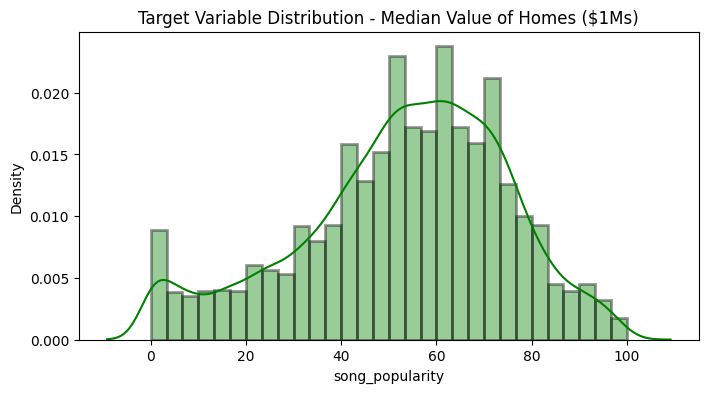

In [9]:
# checking the distribution of target values

import seaborn as sns
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()


                               Visualising Categorical Features:                                


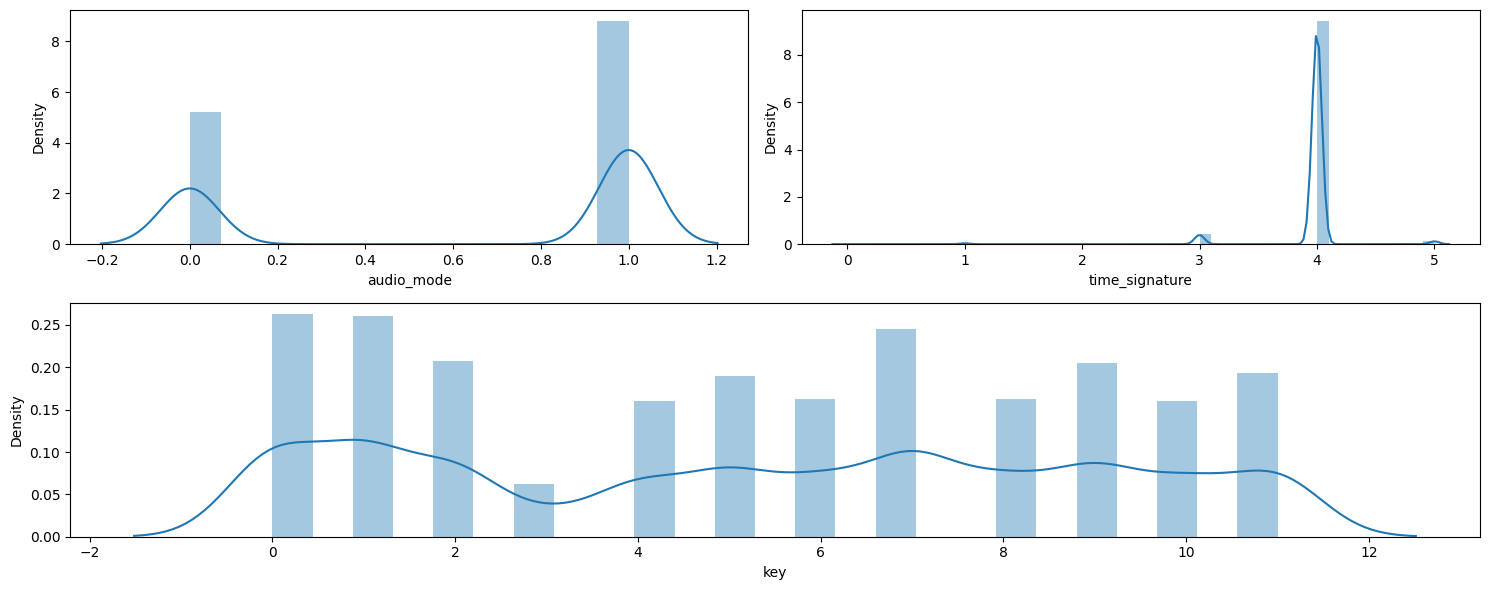

In [10]:
#Visualising the categorical features
import math
print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.distplot(df[cf[i]])
    else:
        plt.subplot(2,1,2)
        sns.distplot(df[cf[i]])

plt.tight_layout()
plt.show()

                                  Numeric Features Distribution                                 


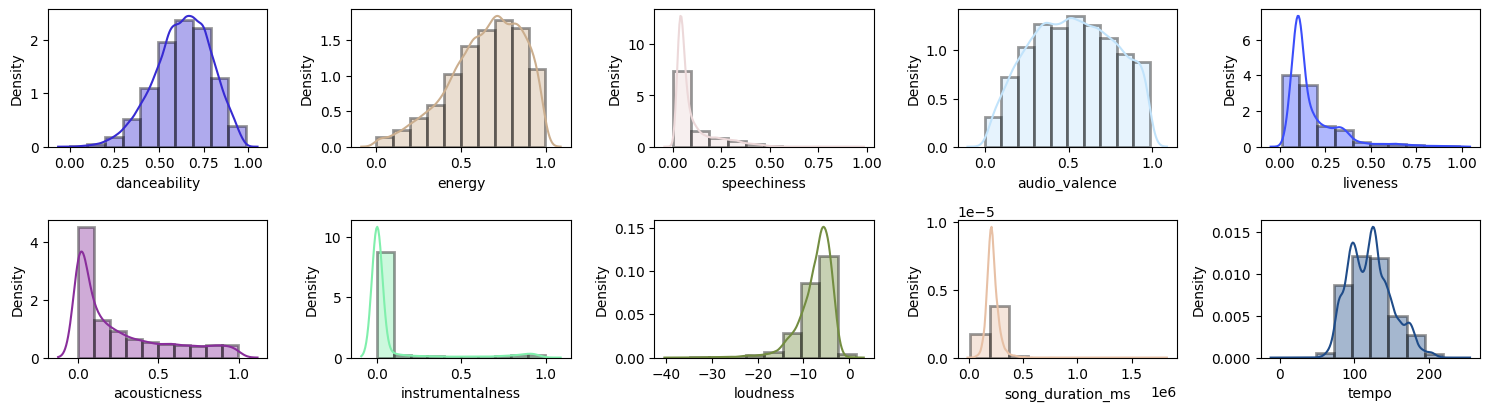

In [11]:
print('\033[1m Numeric Features Distribution'.center(100))

n=5


plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()


# Data Preprocessing

In [12]:
# Removal of duplicate rows

rs ,cs = orginal_df.shape

df.drop_duplicates(inplace= True)

if df.shape == (rs,cs):
  print("\n\033[1m The dataset doesn't have any duplicates")
else:
  print("\n\033[1m The dataset contains {} -->duplicates".format(rs-df.shape[0]))


 The dataset contains 3911 -->duplicates


In [13]:
df.shape

(14924, 14)

In [14]:
# check for empty values
df.isna().sum().sort_values()

,0
song_popularity,0
song_duration_ms,0
acousticness,0
danceability,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
audio_mode,0


In [15]:
pd.get_dummies(df["key"],prefix=str(4))

,4_0,4_1,4_2,4_3,4_4,4_5,4_6,4_7,4_8,4_9,4_10,4_11
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
18830,False,False,False,False,False,False,False,False,False,False,False,True
18831,False,False,False,False,False,False,False,False,False,False,False,True
18832,True,False,False,False,False,False,False,False,False,False,False,False
18833,False,False,False,True,False,False,False,False,False,False,False,False


In [16]:
pd.get_dummies(df["key"],drop_first = True)[:10]

,1,2,3,4,5,6,7,8,9,10,11
0,False,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,False
8,True,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,True,False,False


In [17]:
df["key"].value_counts()

,count
key,
0,1734
7,1654
1,1593
9,1410
2,1399
5,1257
11,1221
4,1083
6,1048


## Since for Categorical features and numerical features we need to one hot encoding and dummy encoding
* There is no difference between one-hot encoding and dummy encoding ,in later  we will drop one of the column (generally first column) to avoid multi-collinearity in regression models

> **Multicollinearity** occurs when two or more independent variables have a high correlation with one another in a regression model, which makes it difficult to determine the individual effect of each independent variable on the dependent variable.


* so ,for generally we do one_hot encoding for less categorical values and dummy encoding for columns having multiple unique values (generally more than 2 0r 3 ).

### 🔑**Note:**  Before one_hot encoding or any encoding make sure of null/na columns to be filled or imputed

In [18]:
# converting categorical columns into one_hot_encoded
# Since we don't have the null/na value features we don't ,but for the process of completion we need check and proceed for one_hot_encoding

df3 = df.copy()

ecc = []
fcc = [i for i in cf if i not in ecc]

oh = True ; dm = True;

for i in fcc:
  if df3[i].nunique() <= 3 :
    if oh == True:
      print("\033[1mThe One hot Encoding columns: \033[0m ");oh=False
    print(i)
    df3 = pd.concat([df3.drop(i,axis =1),pd.get_dummies(df3[i] ,prefix = str(i))],axis=1)
  if df[i].nunique() <= 15 and df[i].nunique() >3 :
    if dm == True: print("\033[1mThe Dummy Encoding columns are : \033[0m");dm=False
    print(i)
    df3 = pd.concat([df3.drop(i,axis =1) , pd.DataFrame(pd.get_dummies(df3[i],drop_first = True , prefix =str(i)))],axis =1)





df3.shape




The One hot Encoding columns:  
audio_mode
The Dummy Encoding columns are : 
time_signature
key


(14924, 28)

In [19]:
df3.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,...,False,False,False,False,False,False,True,False,False,False
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,...,False,True,False,False,False,False,False,False,False,False
2,76,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,...,False,False,False,False,False,False,False,False,False,False
3,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,...,False,False,False,False,False,False,False,False,False,False
4,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,...,False,False,False,False,False,False,False,False,True,False


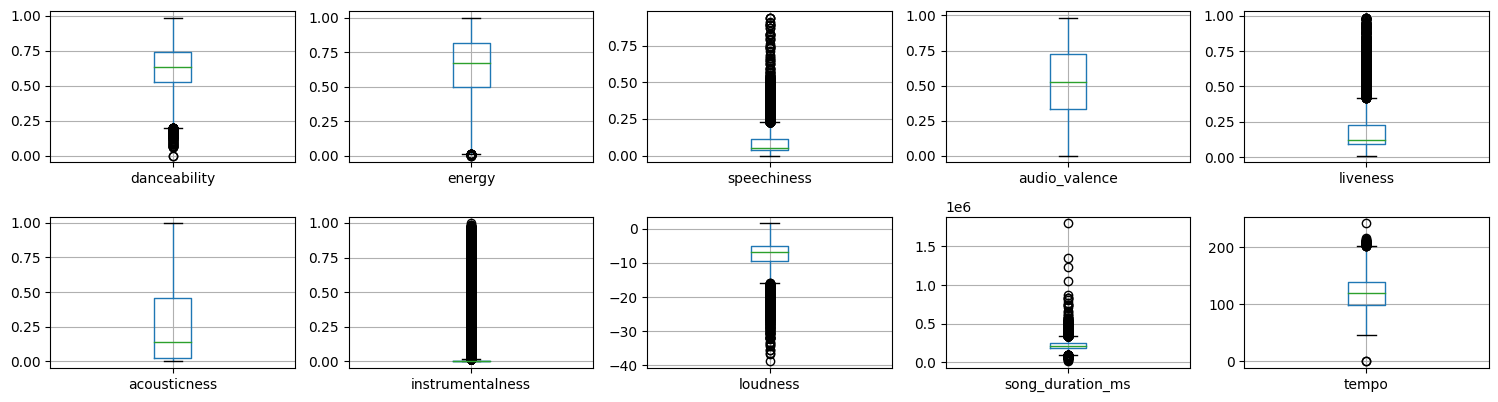

In [20]:
plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [21]:
# Removal of outliers

df1 = df3.copy()

features1 = nf

for i in features1:
  Q1 = df1[i].quantile(0.25)
  Q3 = df1[i].quantile(0.75)
  IQR = Q3 - Q1 # InterQuartile Range
  df1 = df1[df1[i] >= Q1-(1.5*IQR)]
  df1 = df1[df1[i] <= Q3 + (1.5*IQR)]
  df1 = df1.reset_index(drop = True)
display(df1.head())

print("\033[1m Inference:\n \033[1mBefore Removal of outliers , the dataset has {} samples ".format(df3.shape[0]))
print("\033[1m After Removal of outliers , the dataset has {} samples ".format(df1.shape[0]))



,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,...,False,False,False,False,False,False,True,False,False,False
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,...,False,True,False,False,False,False,False,False,False,False
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,...,False,False,False,False,False,False,False,False,False,False
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,...,False,False,False,False,False,False,False,False,True,False
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0.1240,189.931,...,False,False,True,False,False,False,False,False,False,False


 Inference:
 Before Removal of outliers , the dataset has 14924 samples 
 After Removal of outliers , the dataset has 8950 samples 


In [22]:
df3["energy"].quantile(0.75)

0.818

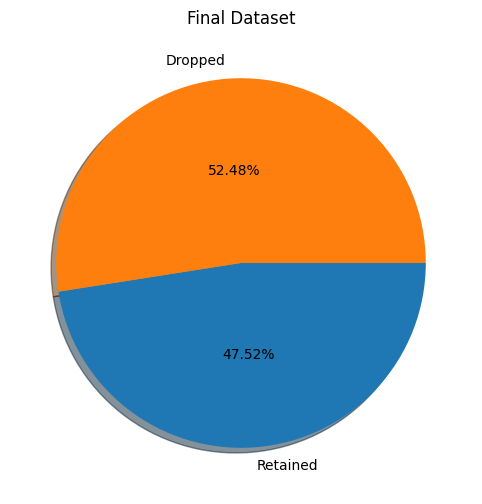

In [23]:
df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], orginal_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False,
         autopct='%1.2f%%',pctdistance=0.5, explode=[0,0], shadow=True);

In [24]:
df.columns

Index(['song_popularity', 'song_duration_ms', 'acousticness', 'danceability',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'audio_valence', 'audio_mode_0', 'audio_mode_1',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'],
      dtype='object')

# Data Manipulation

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop([target],axis =1)
y = df[target]

x_train,x_test,y_train,y_test = train_test_split(X,y ,
                                                random_state = 123,
                                                test_size = 0.2)

print(" orginal dataset --> {} ,{} ".format(X.shape,y.shape))
print("Training dataset --> {} ,{}".format(x_train.shape,y_train.shape))
print("Test dataset --> {} ,{}".format(x_test.shape,y_test.shape))

 orginal dataset --> (8950, 27) ,(8950,) 
Training dataset --> (7160, 27) ,(7160,)
Test dataset --> (1790, 27) ,(1790,)


In [26]:
# Feature Scaling Standardization

from sklearn.preprocessing import StandardScaler

print("\033[1mStandardization on Training set: ".center(100))
x_train_std = StandardScaler().fit_transform(x_train)
x_train_std = pd.DataFrame(x_train_std , columns = x_train.columns)
display(x_train_std.head())
display(x_train_std.describe())

print("\033[1mStandardization on Test set: ".center(100))
x_test_std = StandardScaler().fit_transform(x_test)
x_test_std = pd.DataFrame(x_test_std , columns = x_test.columns)
display(x_test.head())
display(x_test_std.describe())


                               Standardization on Training set:                                 


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,-0.869190,2.361342,-0.966500,-1.979055,-0.343187,-0.473138,-0.954316,-0.857402,-1.768262,-0.278157,...,-0.317586,-0.171683,-0.275762,-0.313304,-0.268359,-0.365553,3.483908,-0.326043,-0.262632,-0.295778
1,1.732104,-0.908443,-0.372214,1.663946,1.048206,-1.431242,1.780271,0.927891,0.548299,-0.829445,...,3.148751,-0.171683,-0.275762,-0.313304,-0.268359,-0.365553,-0.287034,-0.326043,-0.262632,-0.295778
2,0.124435,-0.807737,2.278166,-0.538091,-0.096649,-0.271903,0.200789,-0.393524,0.360856,-0.887042,...,-0.317586,-0.171683,-0.275762,3.191786,-0.268359,-0.365553,-0.287034,-0.326043,-0.262632,-0.295778
3,0.708690,-0.821977,-0.092148,1.395034,-0.342569,-0.921446,0.703120,-0.748880,0.875881,1.083605,...,-0.317586,-0.171683,-0.275762,-0.313304,3.726346,-0.365553,-0.287034,-0.326043,-0.262632,-0.295778
4,0.168021,-0.801164,1.759019,-0.807003,0.669921,-1.096968,-0.751053,0.534232,-1.099102,0.092110,...,-0.317586,-0.171683,-0.275762,-0.313304,-0.268359,2.735583,-0.287034,-0.326043,-0.262632,-0.295778


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,...,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03
mean,4.465702e-17,-4.465702e-17,-8.068034e-16,-1.791243e-16,7.740549e-17,5.656555e-17,7.690930e-18,-3.671799e-17,1.597729e-16,1.543148e-16,...,1.190854e-17,-7.343598e-17,2.877897e-17,9.923781e-19,-9.477211e-17,8.286357e-17,-5.954269e-18,-5.755793e-17,-2.778659e-17,-8.435214e-18
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,...,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.627408e+00,-9.176330e-01,-2.926962e+00,-3.155166e+00,-3.431866e-01,-1.537449e+00,-2.862735e+00,-9.701801e-01,-2.241670e+00,-2.141427e+00,...,-3.175862e-01,-1.716834e-01,-2.757616e-01,-3.133042e-01,-2.683594e-01,-3.655528e-01,-2.870340e-01,-3.260431e-01,-2.626325e-01,-2.957783e-01
25%,-6.682560e-01,-8.230728e-01,-6.386182e-01,-6.750836e-01,-3.431866e-01,-6.911431e-01,-5.835787e-01,-6.956834e-01,-7.626297e-01,-8.047605e-01,...,-3.175862e-01,-1.716834e-01,-2.757616e-01,-3.133042e-01,-2.683594e-01,-3.655528e-01,-2.870340e-01,-3.260431e-01,-2.626325e-01,-2.957783e-01
50%,-5.573019e-02,-4.155728e-01,6.496201e-02,1.265796e-01,-3.416908e-01,-3.837003e-01,1.874933e-01,-4.020357e-01,-1.168522e-02,1.600529e-03,...,-3.175862e-01,-1.716834e-01,-2.757616e-01,-3.133042e-01,-2.683594e-01,-3.655528e-01,-2.870340e-01,-3.260431e-01,-2.626325e-01,-2.957783e-01
75%,6.092411e-01,5.940486e-01,7.275570e-01,8.013973e-01,-2.665513e-01,4.883192e-01,7.404576e-01,3.001654e-01,6.190701e-01,8.285320e-01,...,-3.175862e-01,-1.716834e-01,-2.757616e-01,-3.133042e-01,-2.683594e-01,-3.655528e-01,-2.870340e-01,-3.260431e-01,-2.626325e-01,-2.957783e-01
max,2.714031e+00,2.675366e+00,2.394291e+00,1.699463e+00,6.700737e+00,2.858424e+00,2.795496e+00,3.417512e+00,2.758657e+00,1.770658e+00,...,3.148751e+00,5.824674e+00,3.626320e+00,3.191786e+00,3.726346e+00,2.735583e+00,3.483908e+00,3.067080e+00,3.807602e+00,3.380910e+00


                                 Standardization on Test set:                                   


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
8884,191599,0.11900,0.602,0.588,0.000000,0.0916,-7.146,0.0538,147.670,0.416,...,True,False,False,False,False,False,False,False,False,False
2771,181913,0.64500,0.547,0.289,0.000000,0.1480,-8.131,0.0348,104.851,0.213,...,False,False,False,False,False,False,False,False,False,False
4345,188857,0.45900,0.920,0.647,0.008550,0.0766,-8.553,0.1190,105.011,0.259,...,False,False,False,False,False,False,False,False,False,False
5817,196754,0.03390,0.712,0.846,0.000384,0.1060,-6.714,0.0538,120.016,0.573,...,False,False,True,False,False,False,False,False,False,False
749,232120,0.00274,0.662,0.736,0.000844,0.0464,-6.511,0.0374,104.003,0.674,...,False,False,False,False,False,True,False,False,False,False


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,...,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03,1.790000e+03
mean,-7.244360e-17,1.746585e-16,-1.389329e-17,-3.552714e-16,-1.190854e-17,2.451174e-16,5.830221e-17,6.152744e-17,1.111463e-16,-7.939025e-18,...,-6.450458e-18,1.190854e-17,-2.778659e-17,-1.587805e-17,3.969512e-17,-6.946647e-17,1.389329e-17,1.984756e-17,-4.167988e-17,5.557317e-17
std,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,...,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00,1.000279e+00
min,-2.701822e+00,-9.283147e-01,-2.924461e+00,-2.889654e+00,-3.503519e-01,-1.568221e+00,-2.762618e+00,-9.984503e-01,-2.579360e+00,-2.117308e+00,...,-3.302209e-01,-1.642102e-01,-2.821595e-01,-2.968937e-01,-2.946600e-01,-3.302209e-01,-2.775169e-01,-3.353986e-01,-2.728182e-01,-3.024292e-01
25%,-6.810848e-01,-8.199429e-01,-6.721732e-01,-6.922237e-01,-3.503519e-01,-6.805201e-01,-6.022323e-01,-7.131612e-01,-7.752309e-01,-7.922766e-01,...,-3.302209e-01,-1.642102e-01,-2.821595e-01,-2.968937e-01,-2.946600e-01,-3.302209e-01,-2.775169e-01,-3.353986e-01,-2.728182e-01,-3.024292e-01
50%,-8.565757e-02,-4.198115e-01,5.792619e-02,1.188056e-01,-3.488424e-01,-3.557796e-01,2.202404e-01,-4.049656e-01,-2.167866e-02,-1.037324e-02,...,-3.302209e-01,-1.642102e-01,-2.821595e-01,-2.968937e-01,-2.946600e-01,-3.302209e-01,-2.775169e-01,-3.353986e-01,-2.728182e-01,-3.024292e-01
75%,6.008754e-01,5.981480e-01,7.174263e-01,8.074155e-01,-2.783415e-01,3.940652e-01,7.273799e-01,3.519877e-01,6.558893e-01,8.251283e-01,...,-3.302209e-01,-1.642102e-01,-2.821595e-01,-2.968937e-01,-2.946600e-01,-3.302209e-01,-2.775169e-01,-3.353986e-01,-2.728182e-01,-3.024292e-01
max,2.747553e+00,2.727790e+00,2.351540e+00,1.725562e+00,6.290494e+00,3.001218e+00,2.204171e+00,3.303793e+00,2.811722e+00,1.839291e+00,...,3.028276e+00,6.089754e+00,3.544095e+00,3.368208e+00,3.393742e+00,3.028276e+00,3.603384e+00,2.981527e+00,3.665445e+00,3.306559e+00


                                                                                         Correlation Matrix                                                                                         


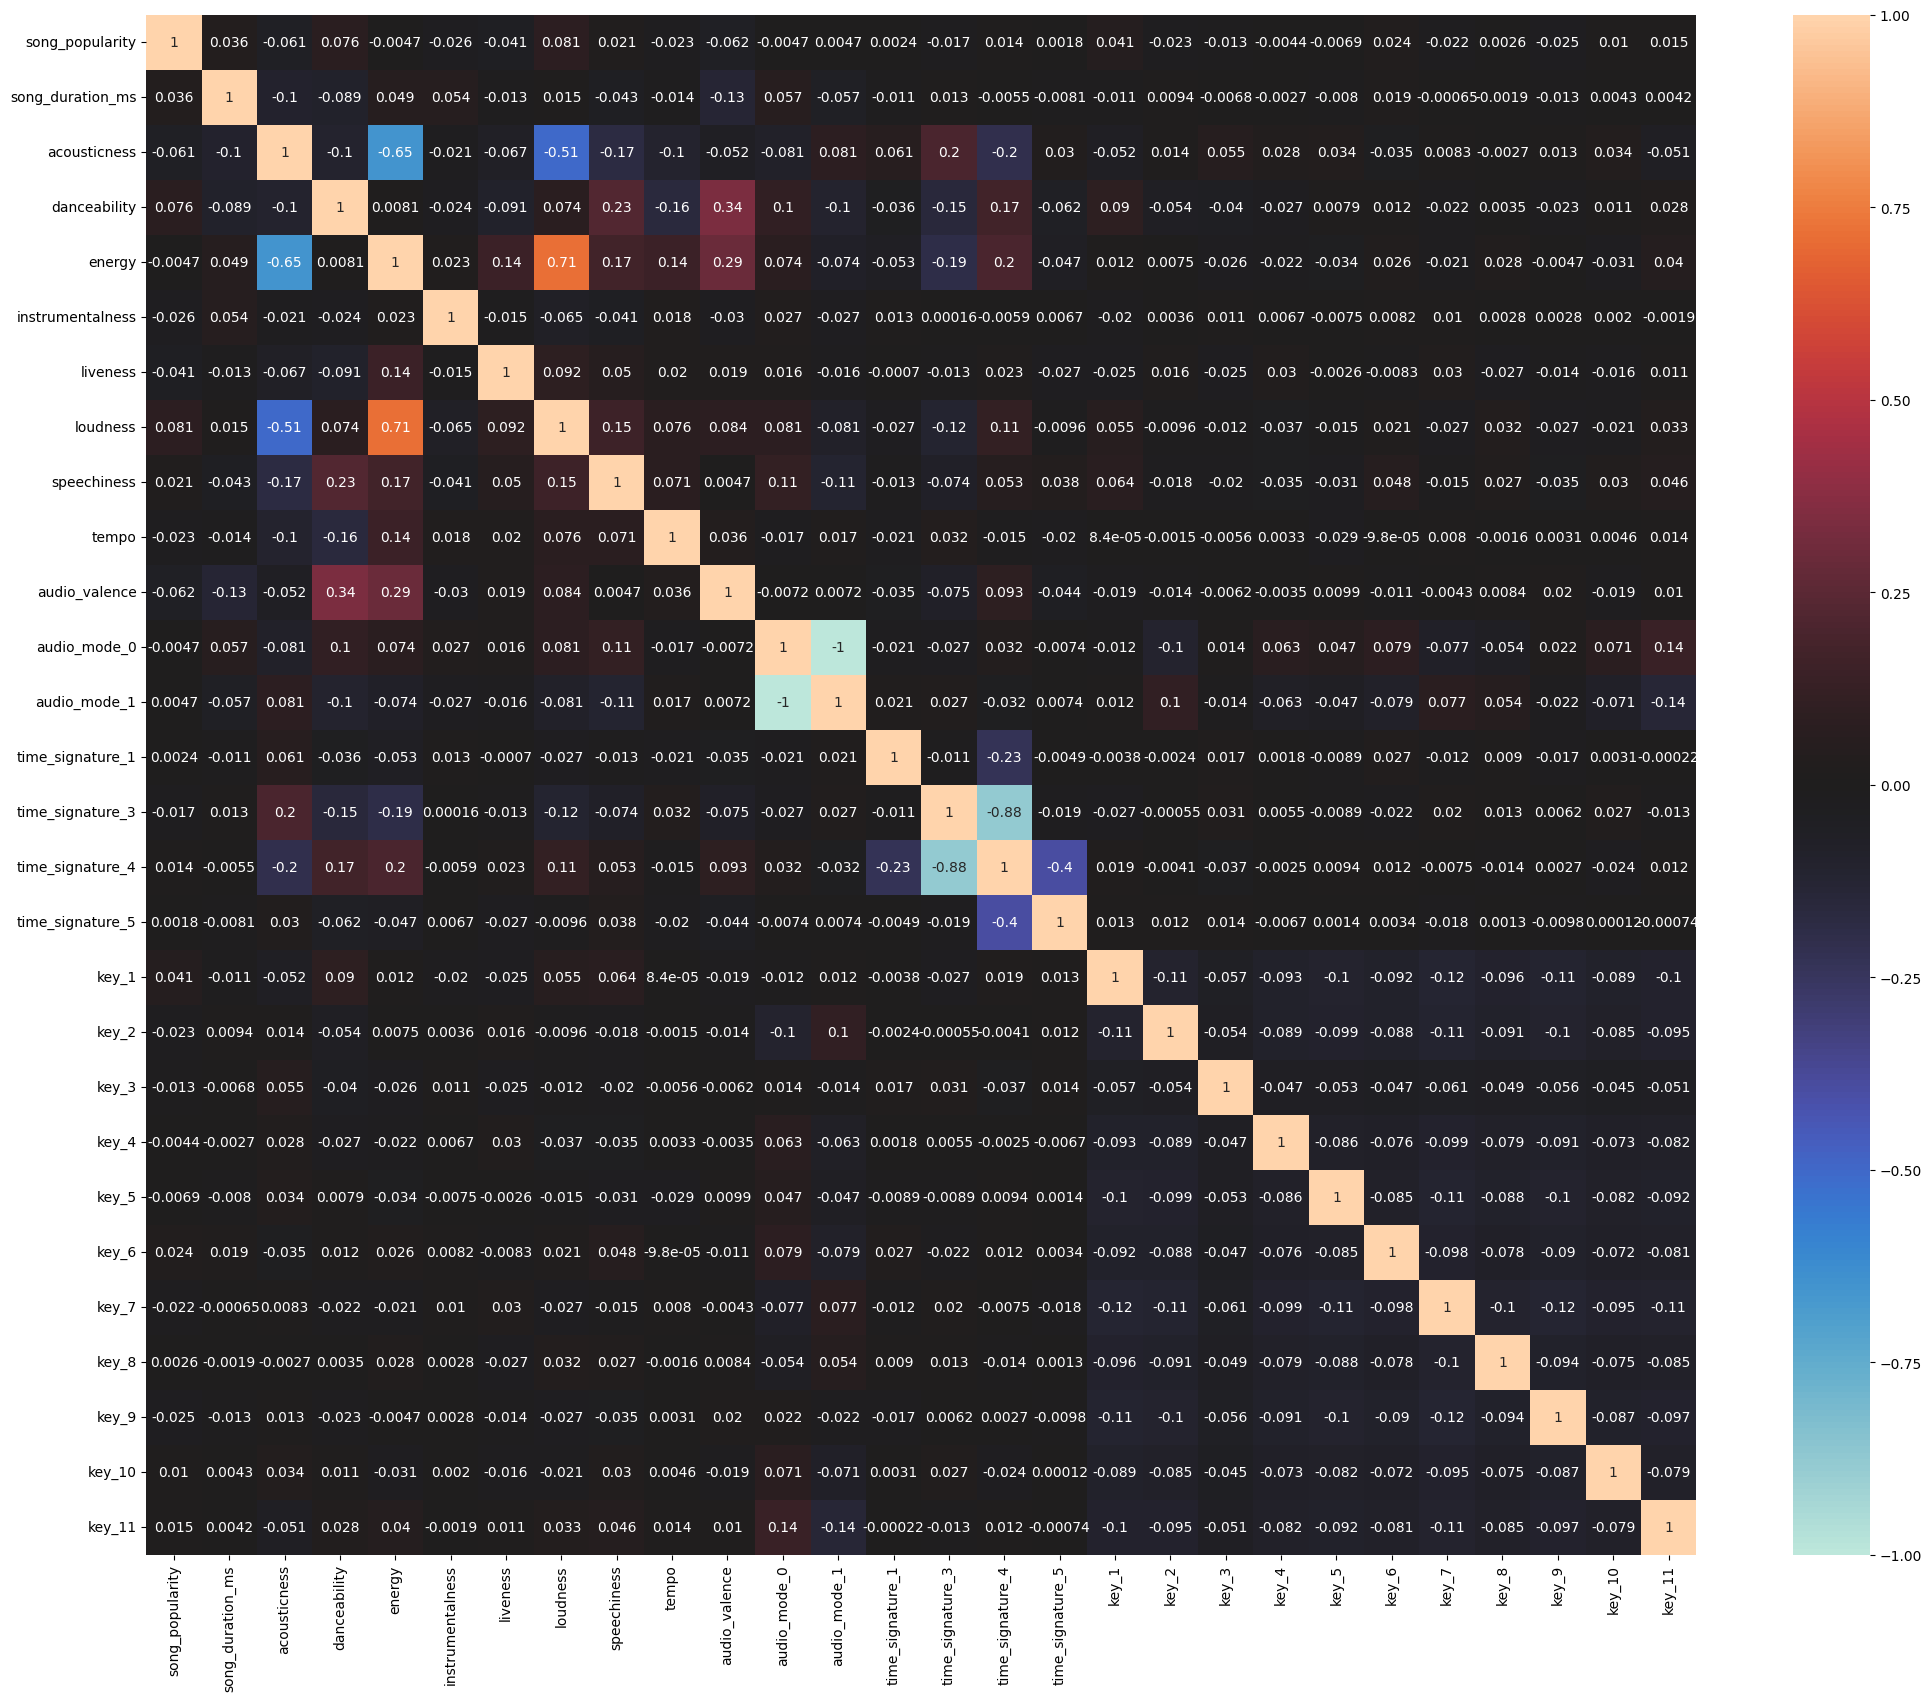

In [27]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(200))
plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), vmin = -1 , vmax =1 ,center =0 ,annot =True)
plt.show()


In [28]:
#Testing a Linear Regression model with statsmodels
from statsmodels.formula import api
Train_xy = pd.concat([x_train_std,y_train.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in x_train.columns)), data=Train_xy).fit()
API.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        song_popularity   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     8.969
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           2.47e-33
Time:                        06:14:28   Log-Likelihood:                -31699.
No. Observations:                7160   AIC:                         6.345e+04
Df Residuals:                    7134   BIC:                         6.363e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           50.3701      0.240    210.073      0.000      49.900      50.840
song_duration_ms     0.5828      0.246      2.370      0.018       0.101       1.065
acousticness        -1.5424      0.334     -4.616      0.000      -2.197      -0.887
danceability         1.6271      0.288      5.656      0.000       1.063       2.191
energy              -2.3791      0.449     -5.302      0.000      -3.259      -1.500
instrumentalness    -0.3968      0.243     -1.631      0.103      -0.874       0.080
liveness            -0.5358      0.245     -2.190      0.029      -1.015      -0.056
loudness             2.6115      0.359      7.278      0.000       1.908       3.315
speechiness         -0.2314      0.258     -0.898      0.369      -0.737       0.274
tempo               -0.2164      0.248     -0.872      0.383      -0.703       0.270
audio_valence       -1.2722      0.292     -4.354      0.000      -1.845      -0.699
audio_mode_0        -0.1916      0.126     -1.518      0.129      -0.439       0.056
audio_mode_1         0.1916      0.126      1.518      0.129      -0.056       0.439
time_signature_1     0.1062      0.235      0.451      0.652      -0.355       0.567
time_signature_3    -0.0064      0.158     -0.041      0.968      -0.316       0.303
time_signature_4    -0.0303      0.126     -0.240      0.810      -0.278       0.217
time_signature_5     0.0276      0.224      0.123      0.902      -0.412       0.467
key_1                0.3646      0.315      1.158      0.247      -0.253       0.982
key_2               -0.4074      0.307     -1.328      0.184      -1.009       0.194
key_3               -0.1416      0.266     -0.533      0.594      -0.662       0.379
key_4                0.1632      0.297      0.550      0.582      -0.418       0.745
key_5               -0.2088      0.308     -0.678      0.498      -0.812       0.395
key_6                0.2784      0.295      0.944      0.345      -0.300       0.856
key_7               -0.4243      0.321     -1.322      0.186      -1.054       0.205
key_8               -0.0328      0.298     -0.110      0.912      -0.617       0.551
key_9               -0.4398      0.311     -1.415      0.157      -1.049       0.169
key_10               0.0692      0.293      0.236      0.813      -0.505       0.643
key_11               0.1897      0.305      0.621      0.535      -0.409       0.788
==============================================================================
Omnibus:                      454.231   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              545.714
Skew:                          -0.676   Prob(JB):                    3.16e-119
Kurtosis:                       2.959   Cond. No.                     7.03e+15
=====================================================

## We can approach these multi-collinearity by the following methods:
* Manual Methods --> Variance Inflation Factor (VIF)
* Automatic Methods --> Recursive Feature Elimination (RFE)
* Feature Elimation using Principal Component Analysis (PCA) Decomposition.



In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = x_train_std
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif.reset_index(drop=True,inplace = True)
vif.loc[0][0]

'song_duration_ms'

In [30]:
[variance_inflation_factor(X.values, 1)]

[1.941850527814231]

In [31]:
['ord-'+str(i) for i in range(2,3)]

['ord-2']

In [32]:
vif

,Features,VIF
0,song_duration_ms,1.05
1,acousticness,1.94
2,danceability,1.44
3,energy,3.50
4,instrumentalness,1.03
5,liveness,1.04
6,loudness,2.24
7,speechiness,1.16
8,tempo,1.07
9,audio_valence,1.48


Dropped Features -->  ['time_signature_3', 'audio_mode_0', 'energy', 'key_7', 'acousticness', 'danceability', 'key_1', 'time_signature_4', 'key_11', 'key_9', 'key_2', 'loudness', 'key_5', 'audio_mode_1', 'key_4', 'song_duration_ms', 'speechiness', 'key_6', 'audio_valence', 'key_3', 'key_8']


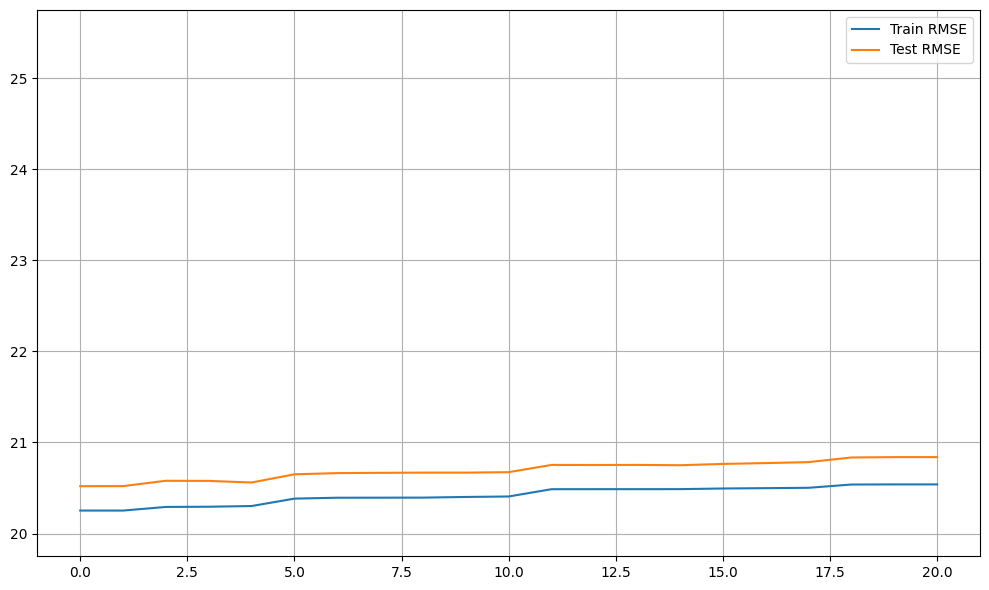

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Trr=[]; Tss=[]; n=3
# order=['ord-'+str(i) for i in range(2,n)]
# Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
# Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[]

for i in range(len(x_train_std.columns)):
    vif = pd.DataFrame()
    X = x_train_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(x_train_std.drop(DROP,axis=1), y_train)

        pred1 = LR.predict(x_train_std.drop(DROP,axis=1))
        pred2 = LR.predict(x_test_std.drop(DROP,axis=1))

        Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
        Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))

        # Trd.loc[i,'ord-'+str(i)] = round(np.sqrt(mean_squared_error(y_train, pred1)),2)
        # Tsd.loc[i,'ord-'+str(i)] = round(np.sqrt(mean_squared_error(y_test ,pred2)),2)

print('Dropped Features --> ',DROP)
# plt.plot(b)
# plt.show()
# print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.ylim([19.75,25.75])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Automatic Method -- RFE

In [34]:
from sklearn.feature_selection import RFE

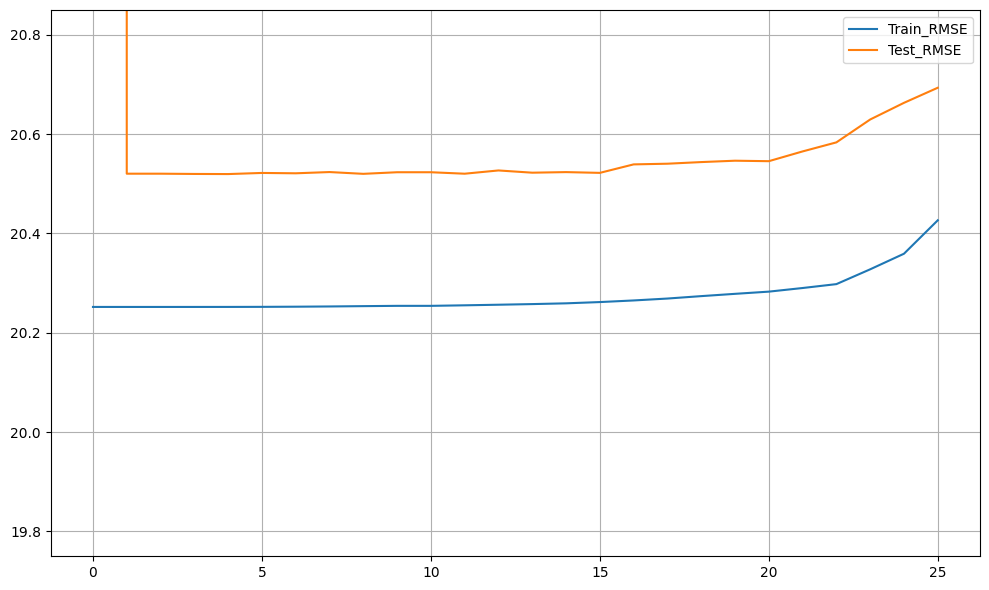

In [35]:
from sklearn.preprocessing import PolynomialFeatures

Trr =[] ; Tss = []

m = df.shape[1]-2
for i in range(m):

  lr = LinearRegression()
  rfe = RFE(lr, n_features_to_select = x_train_std.shape[1]-i)
  rfe = rfe.fit(x_train_std,y_train)


  lr.fit(x_train_std.loc[:,rfe.support_],y_train)


  preds1 = lr.predict(x_train_std.loc[:,rfe.support_])
  preds2 = lr.predict(x_test_std.loc[:,rfe.support_])

  Trr.append(np.sqrt(mean_squared_error(y_train,preds1)))
  Tss.append(np.sqrt(mean_squared_error(y_test,preds2)))



plt.plot(Trr,label = "Train_RMSE")
plt.plot(Tss, label = "Test_RMSE")

plt.legend()
plt.grid()
plt.ylim([19.75,20.85])
plt.tight_layout()
plt.show()


### Feature Extraction using PCA

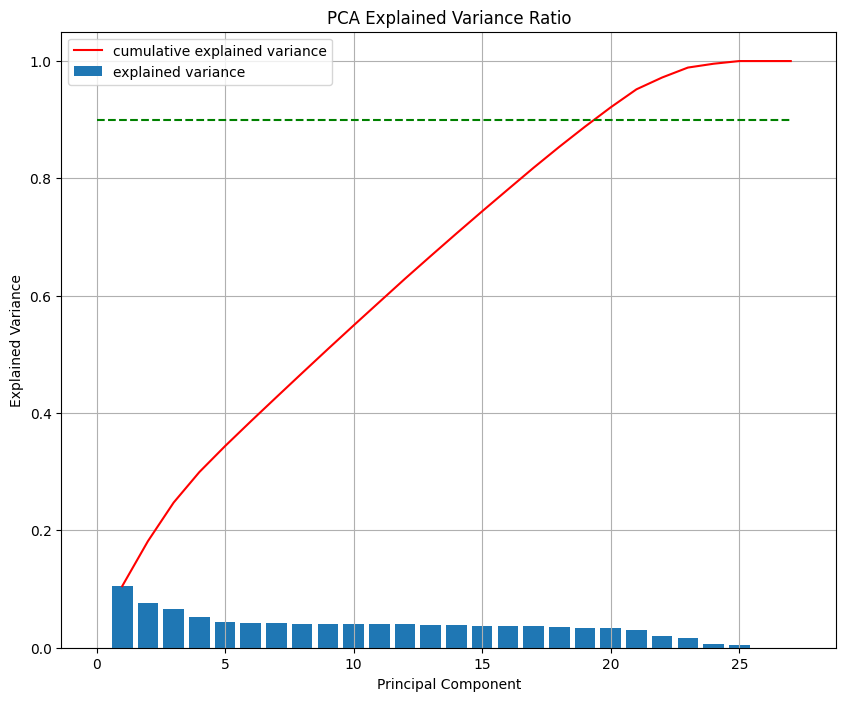

In [36]:
from sklearn.decomposition import PCA

pca = PCA().fit(x_train_std)

x_values = range(1,pca.n_components_+1)

fig,ax = plt.subplots(figsize = (10,8))

ax.bar(x_values,pca.explained_variance_ratio_,label = "explained variance")
ax.plot(x_values,np.cumsum(pca.explained_variance_ratio_ ), label = "cumulative explained variance",color ="r")

ax.plot([0,x_values[-1]],[0.9,0.9],'g--')

plt.title("PCA Explained Variance Ratio")
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

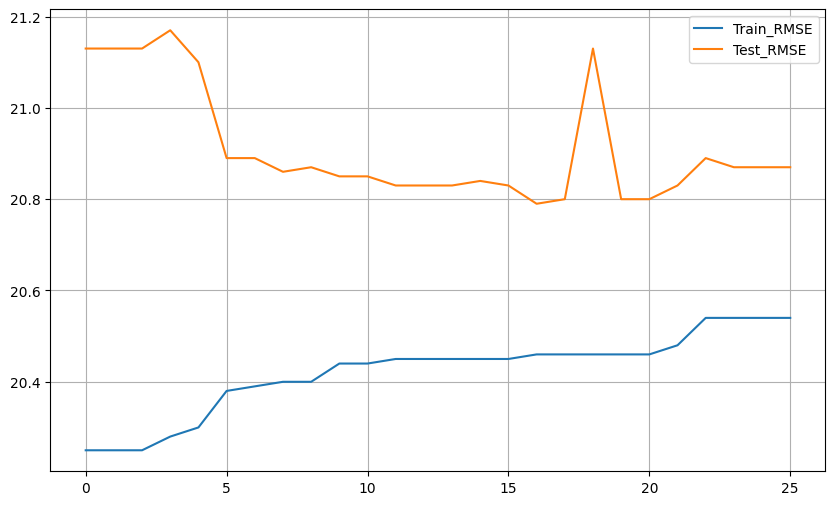

In [37]:
from sklearn.decomposition import PCA

Trr =[]; Tss =[];

for i in range(m):
  pca = PCA(n_components = m-i)
  x_train_std_pca = pca.fit_transform(x_train_std)
  x_test_std_pca = pca.fit_transform(x_test_std)


  lr = LinearRegression()

  lr.fit(x_train_std_pca,y_train)

  preds1 = lr.predict(x_train_std_pca)
  preds2 = lr.predict(x_test_std_pca)


  Trr.append(round(np.sqrt(mean_squared_error(y_train,preds1)),2))
  Tss.append(round(np.sqrt(mean_squared_error(y_test,preds2)),2))

plt.plot(Trr , label = "Train_RMSE")
plt.plot(Tss , label = "Test_RMSE")

plt.legend()
plt.grid()
plt.show()




In [38]:
# #Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=x_train_std.shape[1]-2)             # running RFE
rfe = rfe.fit(x_train_std, y_train)

LR = LinearRegression()
LR.fit(x_train_std.loc[:,rfe.support_], y_train)



pred1 = LR.predict(x_train_std.loc[:,rfe.support_])
pred2 = LR.predict(x_test_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(y_train, pred1)))
print(np.sqrt(mean_squared_error(y_test, pred2)))



20.252068967649823
20.520386158806495


# Predictive Modelling

In [39]:
# Let us first define a function for Evaluation

from sklearn.metrics import r2_score


Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros((4,8)),columns = ["Train_R2","Test_R2","Train_RSS","Test_RSS","Train_MSE",
                                                                             "Test_MSE","Train_RMSE","Test_RMSE"])

def Evaluate(n,preds1,preds2):
  rc = np.random.choice(x_train_std.loc[:,x_train_std.nunique()>=50].columns.values , 3, replace = False)

  plt.figure(figsize = (15,6))
  for i,e in enumerate(rc):
    plt.subplot(2,3 ,i+1)
    plt.scatter(x_train_std[e],y_train,label = "Actual")
    plt.scatter(x_train_std[e],preds1 , label = "Predictions")
    plt.title(e)
    plt.legend()
  plt.show()


  #Evaluating the Multiple Linear Regression Model

  print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
  print("\n R2_Score on Traning Set ---> {}".format(round(r2_score(y_train,preds1),20)))
  print("Residual Sum of Squares RSS on Training Set ---> {}".format(round(sum(np.square(y_train-preds1)),20)))
  print("Mean Squared Error on Training Set ---> {}".format(round(mean_squared_error(y_train,preds1),5)))
  print("Root Mean Squared Error on Training Set ---> {}".format(round(np.sqrt(mean_squared_error(y_train,preds1)),5)))
  print('\n\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
  print("\n R2_Score on Testing Set ---> {}".format(round(r2_score(y_test,preds2),20)))
  print("Residual Sum of Squares RSS on Testing Set ---> {}".format(round(sum(np.square(y_test-preds2)),20)))
  print("Mean Squared Error on Testing Set ---> {}".format(round(mean_squared_error(y_test,preds2),5)))
  print("Root Mean Squared Error on Testing Set ---> {}".format(round(np.sqrt(mean_squared_error(y_test,preds2)),5)))



  print('\n\n{}Plotting Residual Plots{}'.format('-'*20, '-'*20))
  Model_Evaluation_Comparison_Matrix.loc[n,'Train_R2']  = round(r2_score(y_train, preds1),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Test_R2']   = round(r2_score(y_test, preds2),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Train_RSS'] = round(np.sum(np.square(y_train-preds1)),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Test_RSS']  = round(np.sum(np.square(y_test-preds2)),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Train_MSE'] = round(mean_squared_error(y_train, preds1),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Test_MSE']  = round(mean_squared_error(y_test, preds2),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Train_RMSE']= round(np.sqrt(mean_squared_error(y_train, preds1)),20)
  Model_Evaluation_Comparison_Matrix.loc[n,'Test_RMSE'] = round(np.sqrt(mean_squared_error(y_test, preds2)),20)

  # Plotting y_test and y_pred to understand the spread.
  plt.figure(figsize=[15,4])

  plt.subplot(1,2,1)
  sns.distplot((y_train - preds1))
  plt.title('Error Terms')
  plt.xlabel('Errors')

  plt.subplot(1,2,2)
  plt.scatter(y_train,preds1)
  plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
  plt.title('Test vs Prediction')
  plt.xlabel('y_test')
  plt.ylabel('y_pred')
  plt.show()

## Linear Regression Model

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 5.81867028e-01 -1.53663416e+00  1.62209459e+00 -2.36719555e+00
 -3.94033237e-01 -5.23229180e-01  2.60008320e+00 -2.40310523e-01
 -2.23693043e-01 -1.27272912e+00 -5.75568738e+13 -5.75568738e+13
 -3.85889348e+12 -1.48844242e+13 -1.67318251e+13 -7.00509696e+12
  3.46684014e-01 -4.00331378e-01 -1.48633714e-01  1.34975833e-01
 -2.19452258e-01  2.72191359e-01 -4.32724159e-01 -4.71978799e-02
 -4.49173476e-01  5.85273901e-02  1.88865987e-01]
The Intercept of the Regresion Model was found to be  50.36928655199969



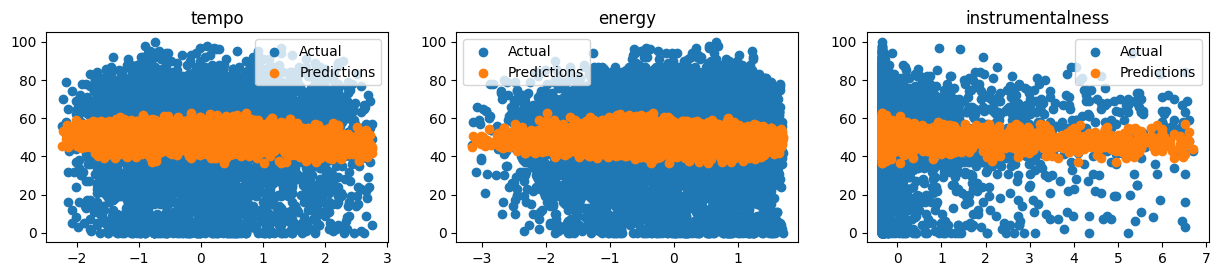



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 0.03047253973362818
Residual Sum of Squares RSS on Training Set ---> 2936647.4898883956
Mean Squared Error on Training Set ---> 410.1463
Root Mean Squared Error on Training Set ---> 20.25207


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> 0.033528905559569444
Residual Sum of Squares RSS on Testing Set ---> 753744.3841107014
Mean Squared Error on Testing Set ---> 421.08625
Root Mean Squared Error on Testing Set ---> 20.52039


--------------------Plotting Residual Plots--------------------


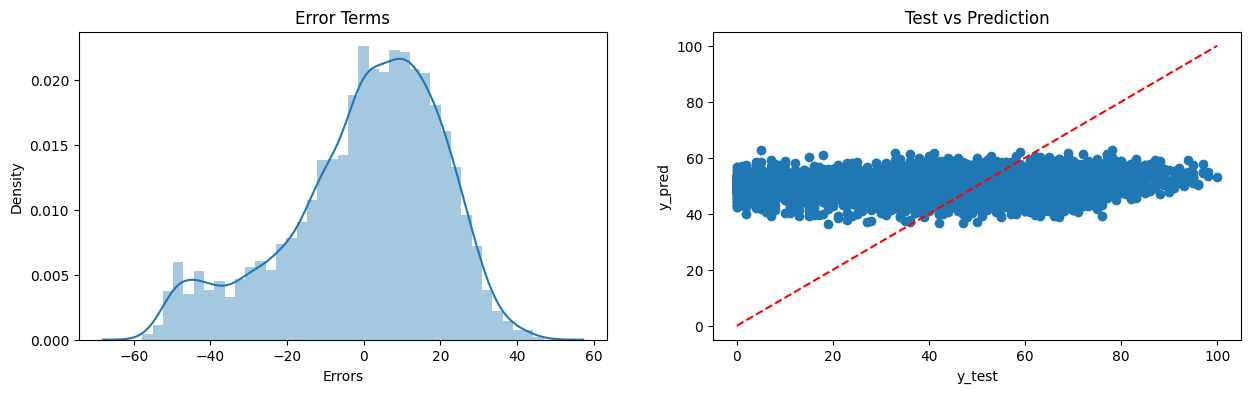

In [41]:
#Linear Regression

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=x_train_std.shape[1]-2)             # running RFE
rfe = rfe.fit(x_train_std, y_train)

LR = LinearRegression()
LR.fit(x_train_std.loc[:,rfe.support_], y_train)



pred1 = LR.predict(x_train_std.loc[:,rfe.support_])
pred2 = LR.predict(x_test_std.loc[:,rfe.support_])

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)
print()

Evaluate(0, pred1, pred2)

## Lasso Regression Model

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 0.         -0.0230965   0.67205652 -0.         -0.         -0.
  0.65737483  0.         -0.         -0.51590017 -0.          0.
  0.          0.          0.          0.         -0.         -0.
  0.         -0.          0.         -0.         -0.          0.
  0.        ]
The Intercept of the Regresion Model was found to be  50.37011173184357


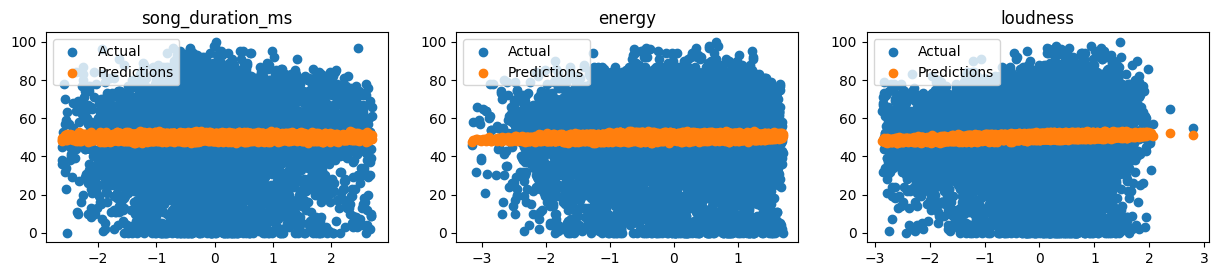



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 0.01106897964288589
Residual Sum of Squares RSS on Training Set ---> 2995419.8489711564
Mean Squared Error on Training Set ---> 418.35473
Root Mean Squared Error on Training Set ---> 20.45372


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> 0.011198528027229204
Residual Sum of Squares RSS on Testing Set ---> 771159.6971572039
Mean Squared Error on Testing Set ---> 430.81547
Root Mean Squared Error on Testing Set ---> 20.75609


--------------------Plotting Residual Plots--------------------


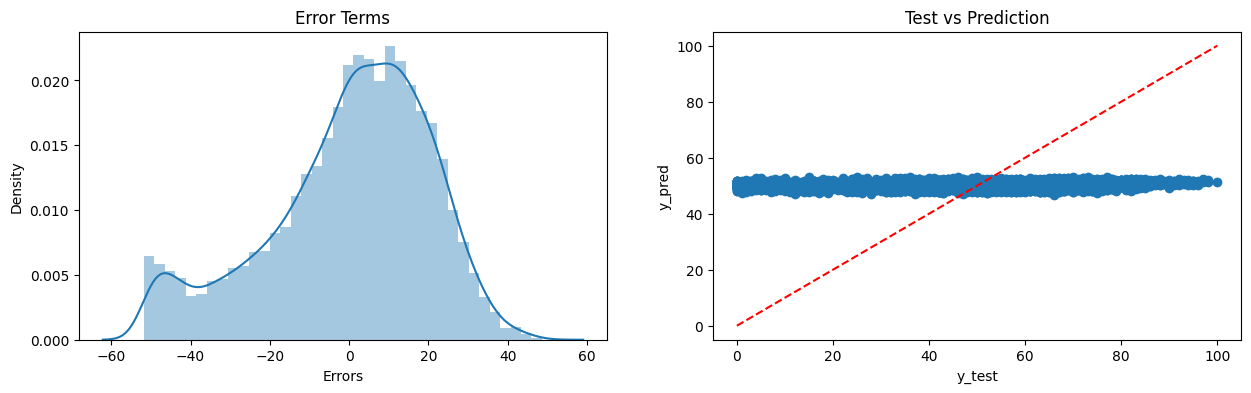

In [45]:
#Creating a Lasso Regression model
from sklearn.linear_model import Lasso

rfe = RFE(lm,n_features_to_select=x_train_std.shape[1]-2)             # running RFE
rfe = rfe.fit(x_train_std, y_train)

LLR = Lasso().fit(x_train_std.loc[:,rfe.support_], y_train)



preds1 = LLR.predict(x_train_std.loc[:,rfe.support_])
preds2 = LLR.predict(x_test_std.loc[:,rfe.support_])


print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',LLR.coef_)
print('The Intercept of the Regresion Model was found to be ',LLR.intercept_)

Evaluate(1, preds1, preds2)

## ElasticNet Regression Model

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 0.58200326 -1.53855792  1.62651309 -2.37026208 -0.39666332 -0.53555878
  2.60513095 -0.23068544 -0.21644626 -1.2728164  -0.3754801   0.00695508
  0.10742733  0.         -0.02301996  0.03036618  0.36498082 -0.4064761
 -0.14094269  0.16300676 -0.20771469  0.27822713 -0.42310192 -0.03195559
 -0.43884265  0.06911945  0.18960808]
The Intercept of the Regresion Model was found to be  50.37011173184357


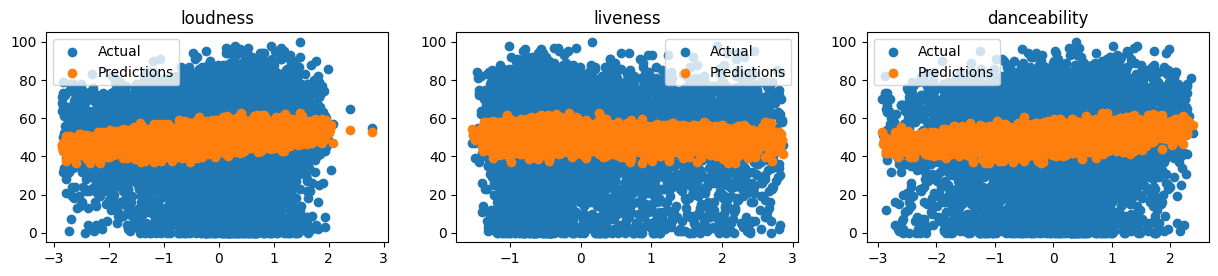



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 0.03047409412932112
Residual Sum of Squares RSS on Training Set ---> 2936642.781705897
Mean Squared Error on Training Set ---> 410.14564
Root Mean Squared Error on Training Set ---> 20.25205


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> 0.03350613429666438
Residual Sum of Squares RSS on Testing Set ---> 753762.143267321
Mean Squared Error on Testing Set ---> 421.09617
Root Mean Squared Error on Testing Set ---> 20.52063


--------------------Plotting Residual Plots--------------------


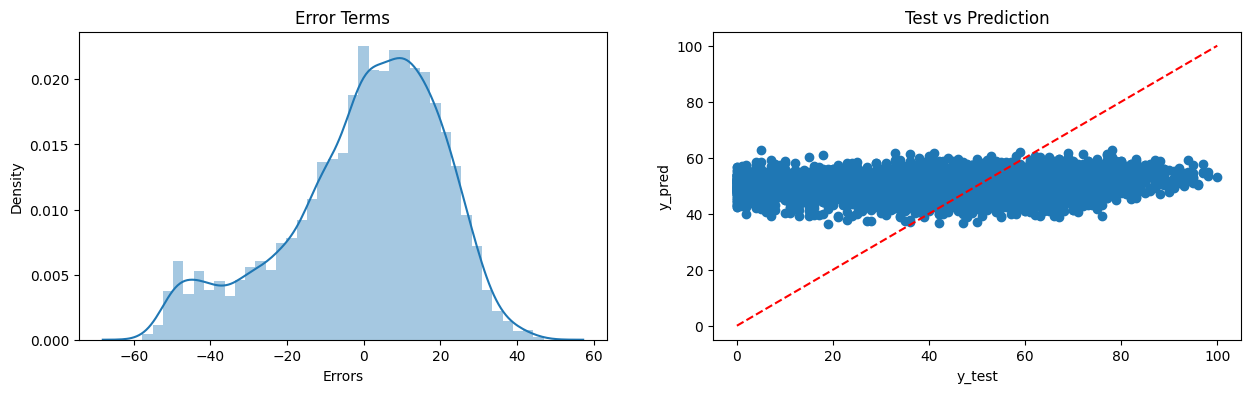

In [46]:
#Creating a ElasticNet Regression model
from sklearn.linear_model import ElasticNet

ENR = ElasticNet(l1_ratio = 0.4,alpha = 0.001,max_iter = 10000).fit(x_train_std,y_train)
pred1 = ENR.predict(x_train_std)
pred2 = ENR.predict(x_test_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',ENR.coef_)
print('The Intercept of the Regresion Model was found to be ',ENR.intercept_)

Evaluate(2, pred1, pred2)

## Polynomial Regression Model

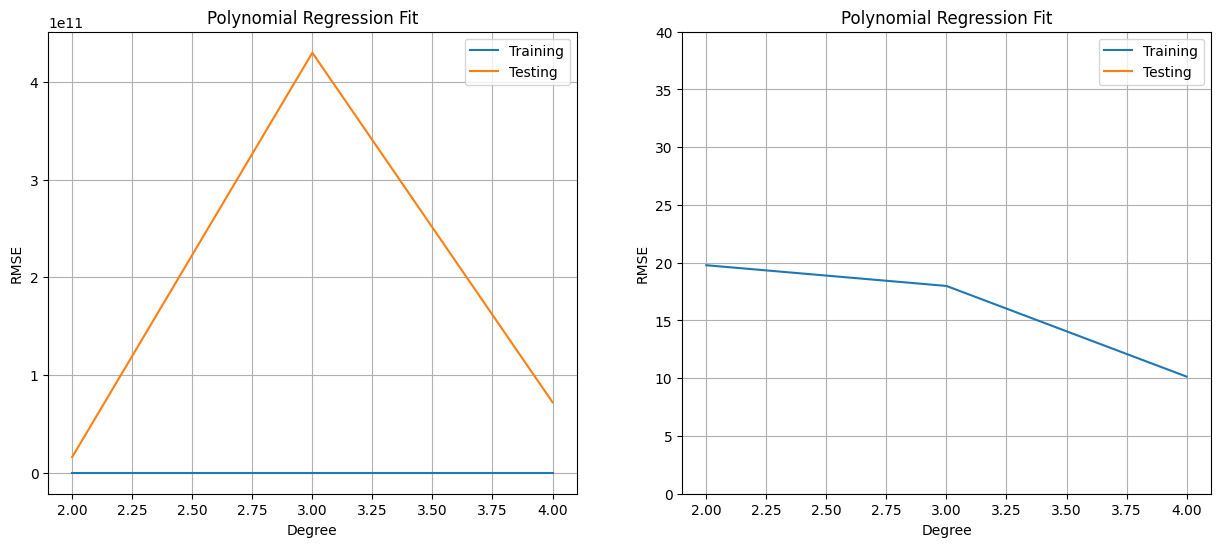

In [47]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=5

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(x_train_std)
    X_poly1 = poly_reg.fit_transform(x_test_std)
    LR = LinearRegression()
    LR.fit(X_poly, y_train)

    preds1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(y_train, preds1)))

    preds2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(y_test, preds2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,40])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.63093373e+12  1.52646873e+08  3.63059170e+07  3.48782090e+07
 -5.89790291e+07  1.93714717e+07 -1.40680184e+08  1.50680976e+08
 -5.69495112e+07  1.82215084e+07  4.76241899e+07  2.15105475e+10
  9.47700138e+09  2.08401710e+10  1.03781859e+10 -2.60893486e+10
  1.74162474e+10 -1.00717866e+10  8.03458981e+08  2.42210621e+09
 -4.90299055e+08  3.39023903e+09  2.29412451e+09 -8.15598122e+08
 -9.53449596e+09  7.97876085e+09 -1.70661207e+09  1.92219551e+09
 -3.74994364e-01 -2.62985522e-01 -5.08891317e-01 -8.12529760e-01
  1.47962292e-01 -1.01177335e-01  1.62332296e-01  3.65085125e-01
  3.41057777e-01  3.73788714e-01 -7.22489800e+08 -7.22489800e+08
  3.15032092e+09  7.36758079e+08  8.28201827e+08  3.46742455e+08
  1.80639029e-02  1.88812017e-01  3.12773228e-01 -1.02713108e-01
 -2.76587963e-01 -2.58851051e-01  4.67367172e-

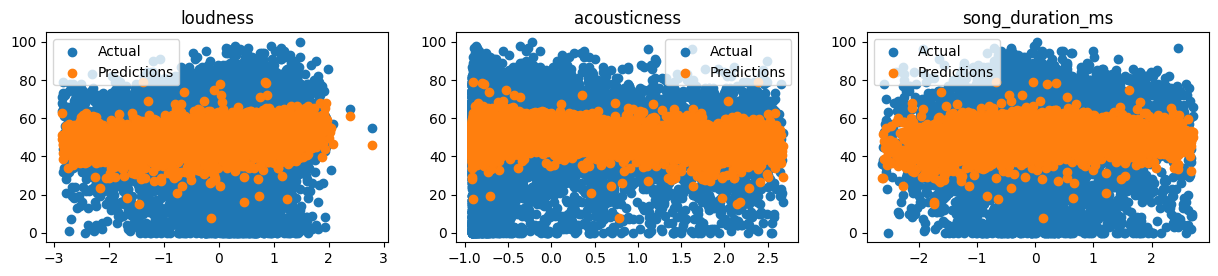



--------------------Training Set Metrics--------------------

 R2_Score on Traning Set ---> 0.0748126349364242
Residual Sum of Squares RSS on Training Set ---> 2802343.6825027466
Mean Squared Error on Training Set ---> 391.38878
Root Mean Squared Error on Training Set ---> 19.78355


--------------------Testing Set Metrics--------------------

 R2_Score on Testing Set ---> -5.866461678953682e+17
Residual Sum of Squares RSS on Testing Set ---> 4.5752144793033104e+23
Mean Squared Error on Testing Set ---> 2.555985742627548e+20
Root Mean Squared Error on Testing Set ---> 15987450524.1691


--------------------Plotting Residual Plots--------------------


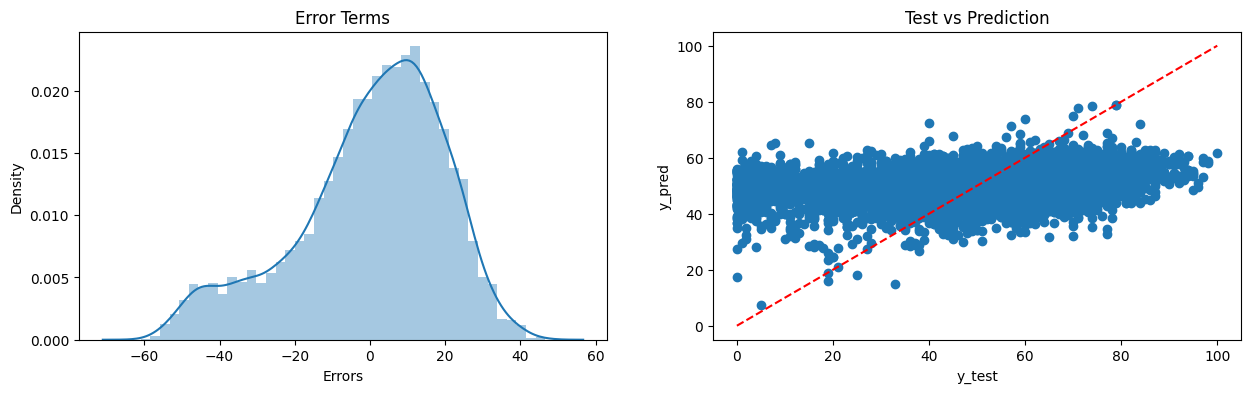

In [48]:
#Using the 3rd Order Polynomial Regression model (degree=3)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x_train_std)
X_poly1 = poly_reg.fit_transform(x_test_std)
PR = LinearRegression()
PR.fit(X_poly, y_train)

preds1 = PR.predict(X_poly)
preds2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',PR.coef_)
print('The Intercept of the Regresion Model was found to be ',PR.intercept_)

Evaluate(3, preds1, preds2)

In [49]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train_R2,Test_R2,Train_RSS,Test_RSS,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE
Multiple Linear Regression (MLR),0.030473,3.352891e-02,2.936647e+06,7.537444e+05,410.146297,4.210862e+02,20.252069,2.052039e+01
Lasso Linear Regression (LLR),0.011069,1.119853e-02,2.995420e+06,7.711597e+05,418.354728,4.308155e+02,20.453722,2.075609e+01
Elastic-Net Regression (ENR),0.030474,3.350613e-02,2.936643e+06,7.537621e+05,410.145640,4.210962e+02,20.252053,2.052063e+01
Polynomial Regression (PNR),0.074813,-5.866462e+17,2.802344e+06,4.575214e+23,391.388782,2.555986e+20,19.783548,1.598745e+10


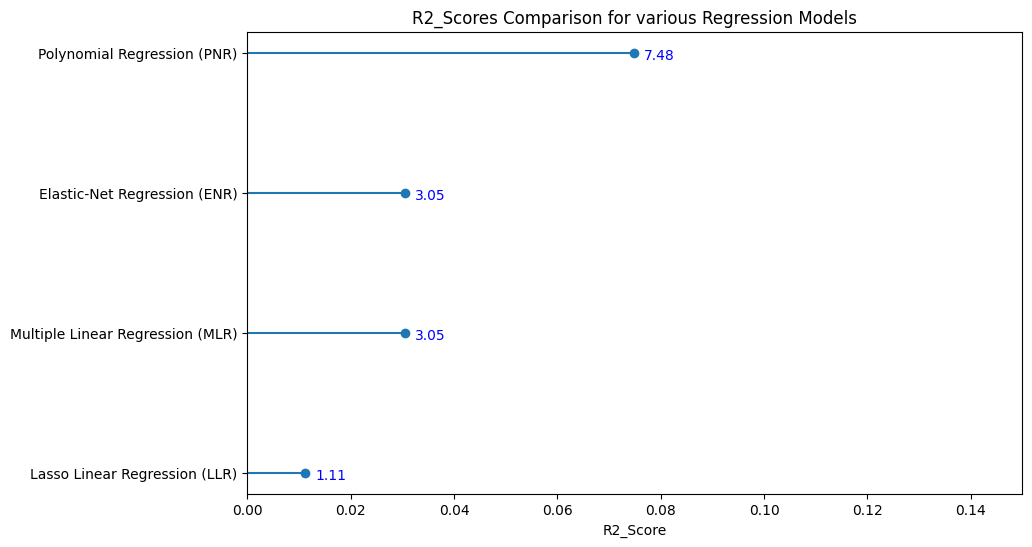

In [51]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train_R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2_Scores Comparison for various Regression Models')
plt.xlabel('R2_Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.002, i-0.05, str(v*100), color='blue')
plt.xlim([0,0.15])
plt.show()

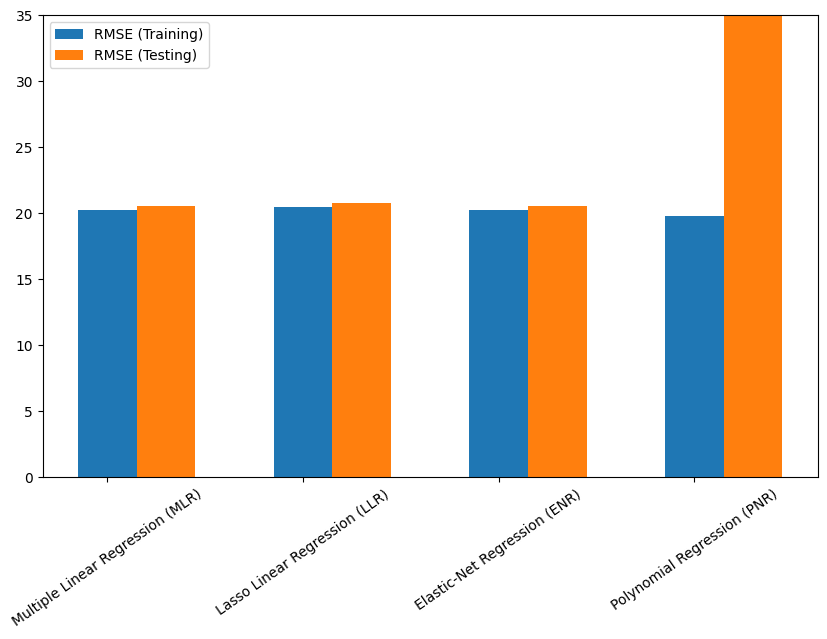

In [52]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(4), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(4)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(4),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,35])
plt.show()


# Conclusion

> **Lesser the RMSE**, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions clearly overfitting the current problem. But according to data Lasso and ElasticNet fits better and unexpectedly Linear Regression with Feature Extraction model too fits better.